# Accuracy and Loss Visualization

In the end, 4 plots per experiment are plotted, showing training/validation accuracy and loss, broken down by which user was used as LOSO (Leave One Subject Out) validation set

## How it Works

Code goes through directory of each experiment, importing each training history from .csv file into a holding list for that specific experiment. That list is then passed to *plot_results_4plot()* method where 4 plots are drawn from the data. Also, training and validation *average* accuracy is also calculated and displayed in the plot title per experiment.

Below are some parameters/descriptions:

- DATA_PATH: root directory where test folders are located in format *type*_*1_or_5**_window*

- USR_DICT: 
    dictionary mapping sparse user number to contiguous index in the array that holds the respective history object

- Training histories are saved in .CSV format with following name convention: *hist_test_usr#.csv*

- Data directory is as follows: *DATA_PATH* -> *Test folder* -> *Training histories CSV files...*

- Plots are saved into root directory of Jupyter, which can be found with ```os.getcwd()```

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [47]:
# maps SPARSE user numbers to CONTINUOUS holding array index
USR_DICT = {2:0, 
            3:1,
            4:2,
            5:3,
            6:4,
            8:5,
            9:6,
            11:7,
            12:8,
            13:9,
            14:10,
            16:11}

In [48]:
def plot_results_4plot(fig, ax1, ax2, ax3, ax4, train_hist, im_type, ts_window, epochs=15):
    
    '''
        Plot training vs. validation loss and accuracy
        for all models in 4 plots
    '''
    
    user_nums = [2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16]
    
    for i in range(len(train_hist)):

        hist = train_hist[i]
        
        # ignore empty history entries (tests where not all users were tried)
        if isinstance(hist, pd.DataFrame):
            
            ax1.plot(range(epochs), hist['accuracy'], label='test user {}'.format(user_nums[i]))
            ax1.set_title('Training Accuracy')
            ax1.legend()
            ax1.grid()
            
            ax2.plot(range(epochs), hist['val_accuracy'], label='test user {}'.format(user_nums[i]))
            ax2.set_title('Validation Accuracy')
            ax2.legend()
            ax2.grid()
            
            ax3.plot(range(epochs), hist['loss'], label='test user {}'.format(user_nums[i]))
            ax3.set_title('Training Loss')
            ax3.grid()
            ax3.legend()
            
            ax4.plot(range(epochs), hist['val_loss'], label='test user {}'.format(user_nums[i]))
            ax4.set_title('Validation Loss')
            ax4.grid()
            ax4.legend()

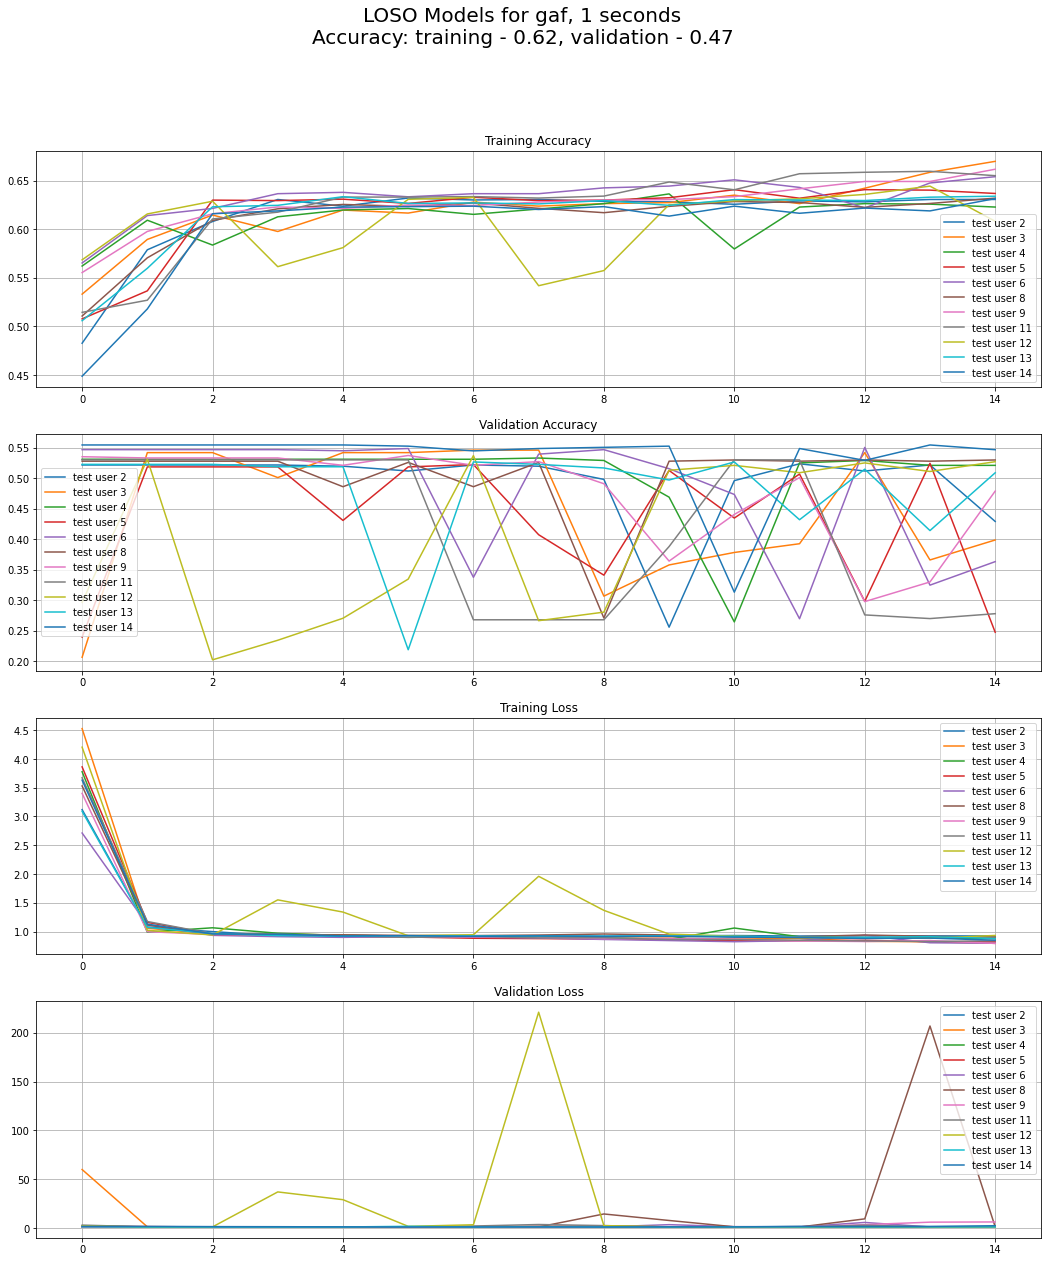

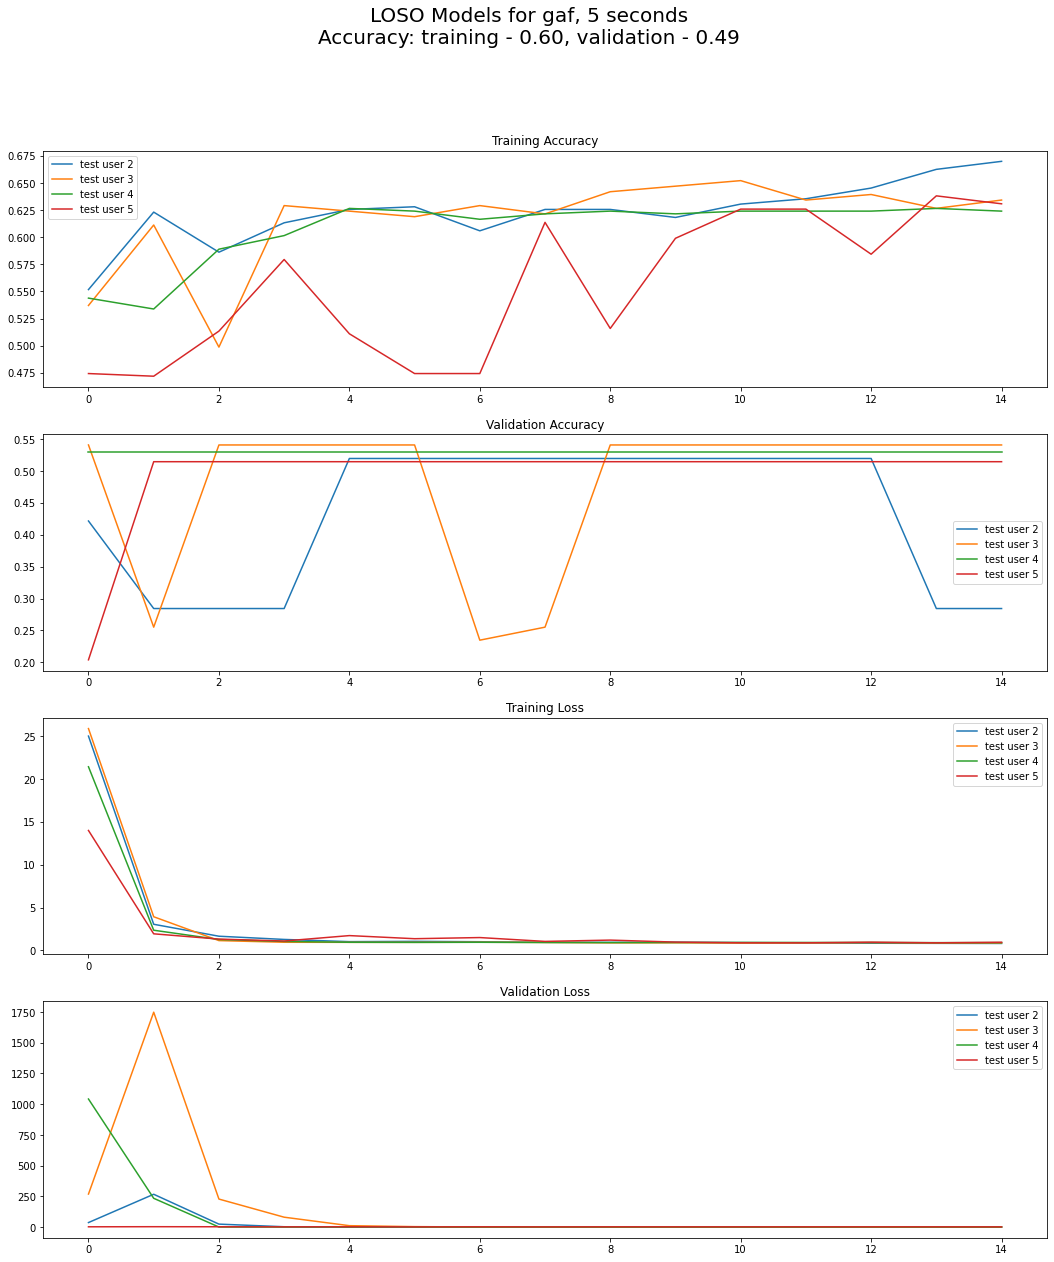

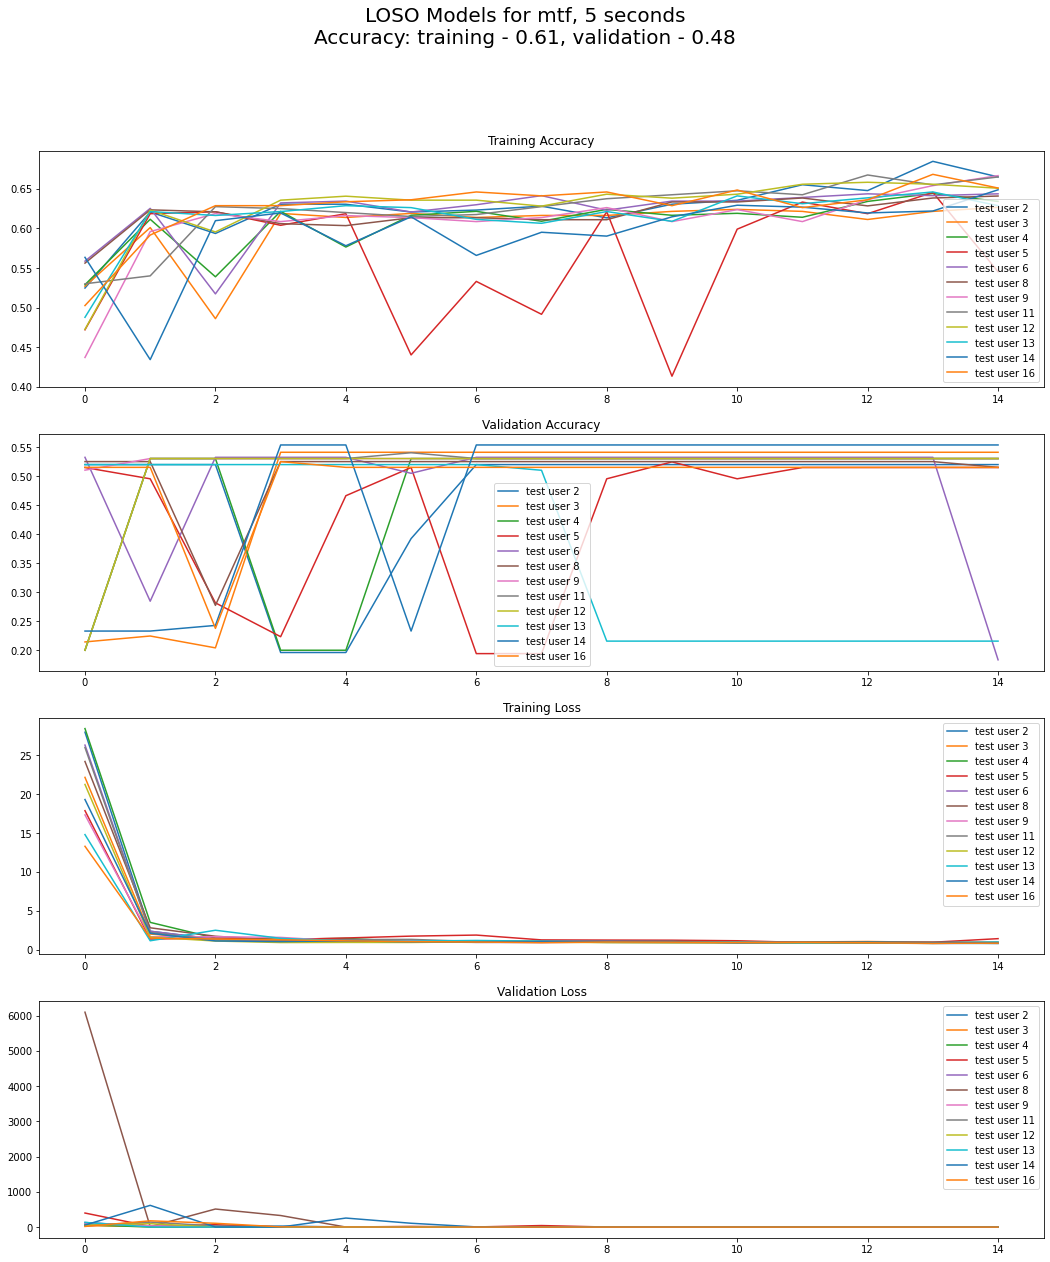

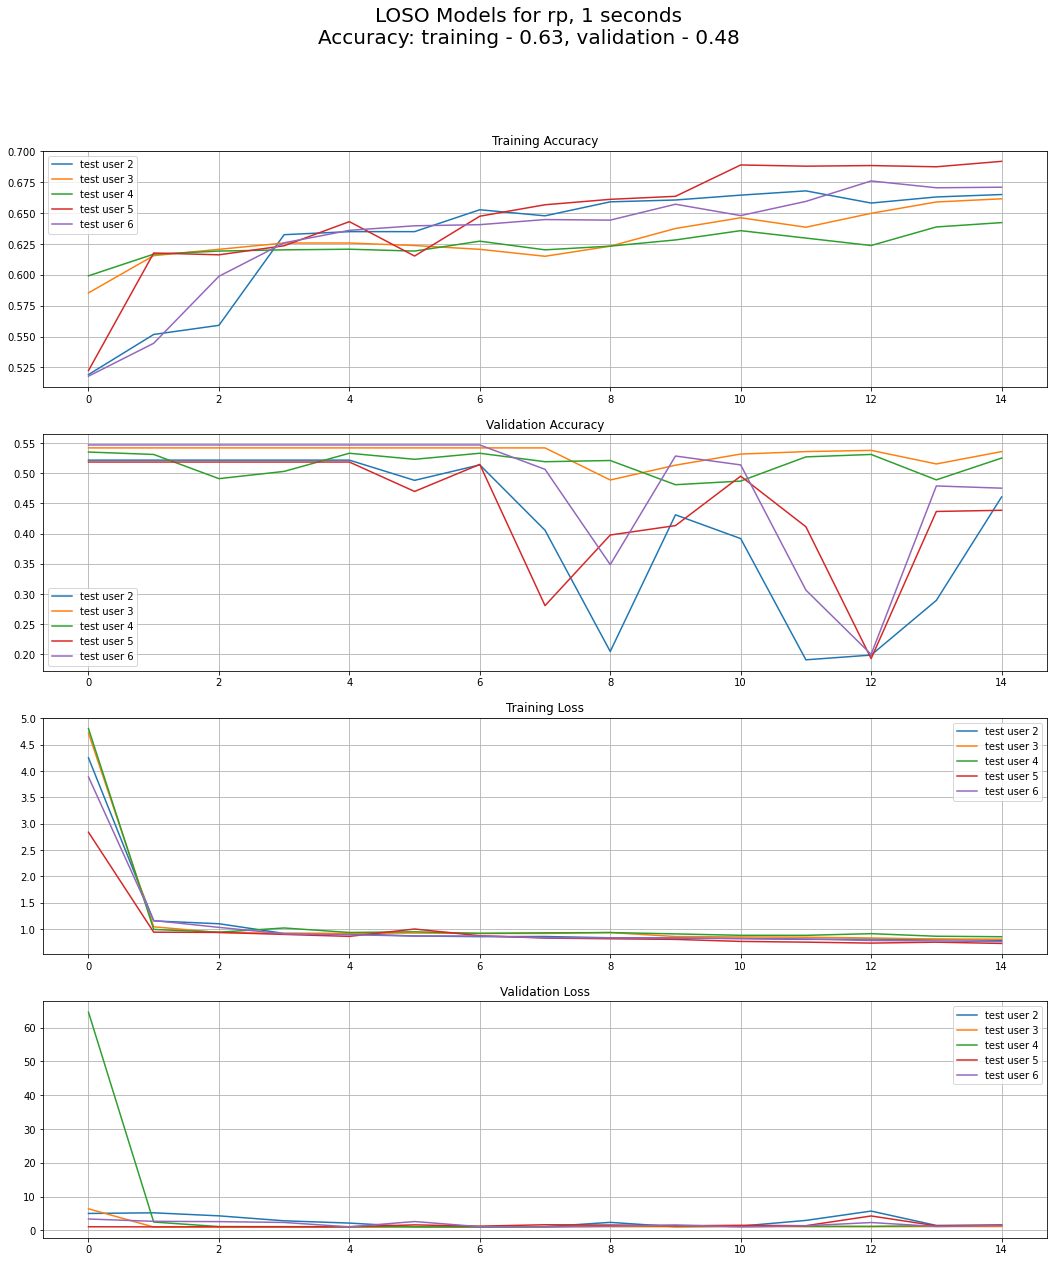

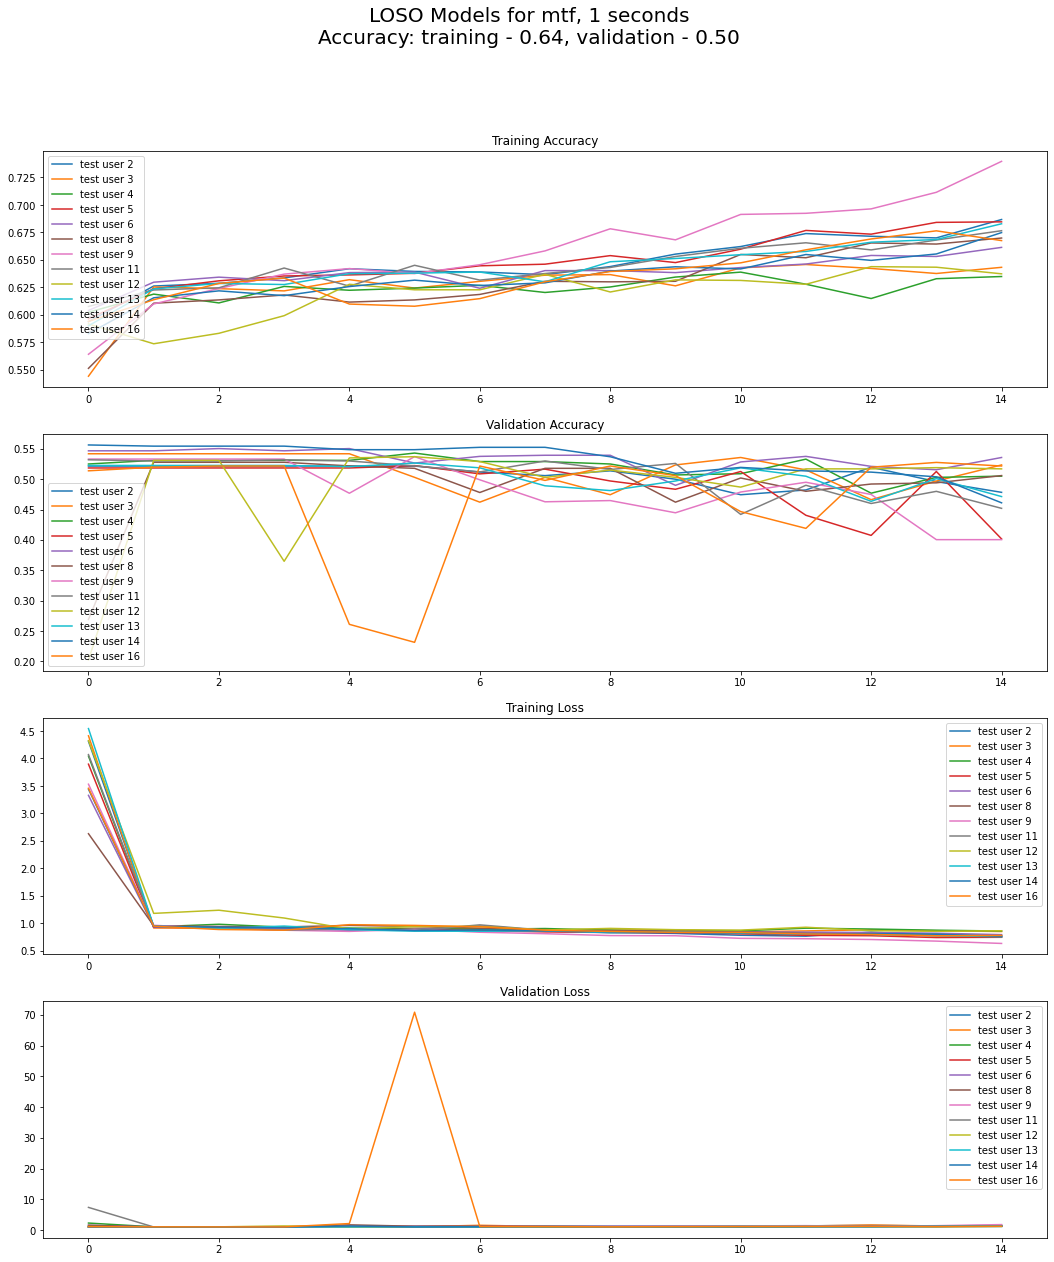

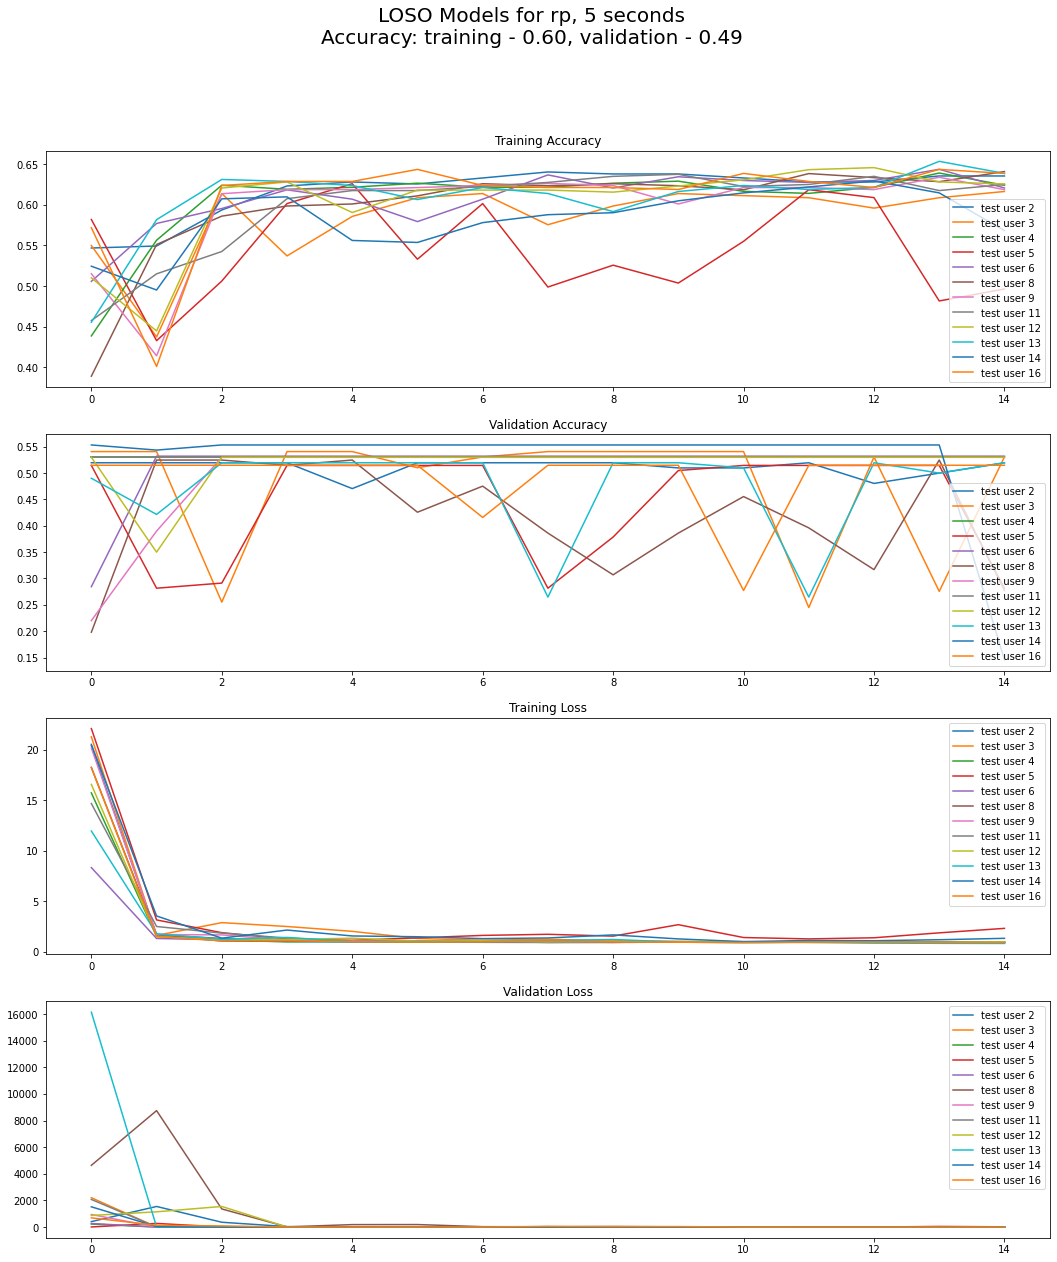

In [55]:
DATA_PATH = '/media/nvidia/Lexar/data/senet_history_all'
user_nums = [2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 16]

# 5 tests
for test in os.listdir(DATA_PATH): 
        
        types = test.split('_')[0]
        ts = test.split('_')[1]
        
        histories = len(user_nums) * [None]
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(18, 20))
        
        train_avg = 0
        val_avg = 0
        num_entries = 0
        
        # get histories
        for hist in os.listdir(os.path.join(DATA_PATH, test)):
            
            # ignore saved models folder
            if (hist != 'models'):
                test_usr = int(re.findall(r'\d+', hist)[0]) #get user number
                index = USR_DICT[test_usr]
                
                file_path = os.path.join(DATA_PATH, test, hist)
                
                histories[index] = pd.read_csv(file_path, dtype='float').iloc[:,1:]
                
                # to get averages
                num_entries = num_entries + histories[index]['val_accuracy'].shape[0]
                train_avg = train_avg + histories[index]['accuracy'].sum()
                val_avg = val_avg + histories[index]['val_accuracy'].sum()
        
        # get average accuracies
        train_avg = train_avg / num_entries
        val_avg = val_avg / num_entries
        
        # plot
        plot_results_4plot(fig, ax1, ax2, ax3, ax4, histories, types, ts)
        fig.suptitle('LOSO Models for {}, {} seconds\nAccuracy: training - {:.2f}, validation - {:.2f}'.format(types, ts, train_avg, val_avg), fontsize=20)
        fig.savefig('{}_{}seconds_loss_accuracy'.format(types, ts), format='jpg')    